# CODSOFT - Data Science Internship
# Task:2: Movie Rating Prediction #
## Name: Faizan Tanveer

#### Importing important libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 1. Reading Data

_Loading the movies data._

In [64]:
df_movie=pd.read_csv('movies.dat', sep = '::',encoding='latin1', header=None)
df_movie.columns =['Movie_ID','Movie_Name','Genre']

C:\Users\HP\AppData\Local\Temp\ipykernel_10884\3873056132.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movie=pd.read_csv('movies.dat', sep = '::',encoding='latin1', header=None)


In [65]:
df_movie

,Movie_ID,Movie_Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


_Loading the movie rating data._

In [66]:
df_rating = pd.read_csv("ratings.dat",sep='::',encoding='latin1', header=None)
df_rating.columns =['User_ID','Movie_IDs','Ratings','Time_Stamp']

C:\Users\HP\AppData\Local\Temp\ipykernel_10884\2497692147.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv("ratings.dat",sep='::',encoding='latin1', header=None)


In [67]:
df_rating

,User_ID,Movie_IDs,Ratings,Time_Stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [68]:
df_rating['Movie_IDs'].min()

1

In [69]:
df_rating['Movie_IDs'].max()

3952

We see that the Movie_IDs column in the first dataframe is same as of the Movie_ID column in the second dataframe. This means, that all these three datasets have some columns in common and all 3 datasets belongs to the same dataset. This means we can change merge all three back into one dataset.

_Loading the User ID data._

In [70]:
df_user = pd.read_csv("users.dat",sep='::',encoding='latin1', header=None)
df_user.columns =['User_IDs','Gender','Age','Occupation','Zip-code']

C:\Users\HP\AppData\Local\Temp\ipykernel_10884\684559005.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv("users.dat",sep='::',encoding='latin1', header=None)


In [71]:
df_user

,User_IDs,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [72]:
# Merging the common columns in dataset 1 and dataset 2 and dropping the reduntant column.
movie_data = df_movie.merge(df_rating, left_on='Movie_ID', right_on='Movie_IDs',how='inner').drop('Movie_IDs', axis=1);
# Merging the common columns in dataset 2 and dataset 3 and dropping the reduntant column.
viewer_data = movie_data.merge(df_user, left_on='User_ID', right_on='User_IDs',how='inner').drop('User_IDs', axis=1);

In [73]:
viewer_data

,Movie_ID,Movie_Name,Genre,User_ID,Ratings,Time_Stamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [74]:
viewer_data.shape

(1000209, 10)

In [75]:
viewer_data.dtypes

Movie_ID       int64
Movie_Name    object
Genre         object
User_ID        int64
Ratings        int64
Time_Stamp     int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [76]:
viewer_data.describe()

,Movie_ID,User_ID,Ratings,Time_Stamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [77]:
viewer_data.to_csv('Complete_Data.csv')

### 2. Completeness

In [78]:
viewer_data.isnull().sum()

Movie_ID      0
Movie_Name    0
Genre         0
User_ID       0
Ratings       0
Time_Stamp    0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

We see that dataset is complete.

### 3. Exploration

Let's visualize the relationship between our explanatory variables (features) and response variable (target), in order to do feature engineering out of it.

_Checking out for the impact of user's Gender on the Rating._

In [79]:
viewer_data['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

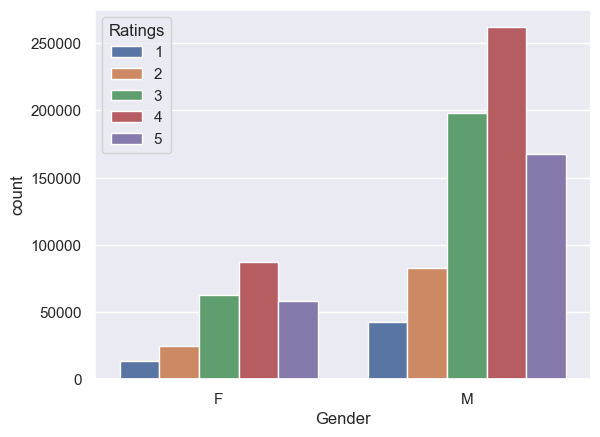

In [80]:
sns.countplot(x='Gender', hue='Ratings', data=viewer_data)

_Checking out for the impact of Genre on the Rating._

In [81]:
viewer_data['Genre'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genre, Length: 301, dtype: int64

In [82]:
#sns.countplot(x='Genre', hue='Ratings', data=viewer_data)

There are about 300 unique and repitive values in the column genre.

_Checking out for the impact of user's age on the Rating._

In [83]:
viewer_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

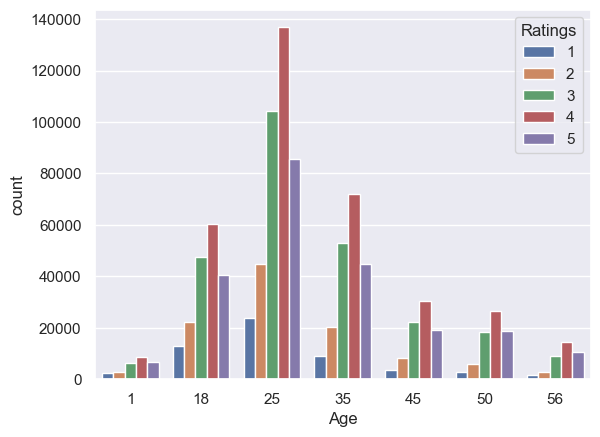

In [84]:
sns.countplot(x='Age', hue='Ratings', data=viewer_data)

_Checking out for the relationship between the age and the gender of users._

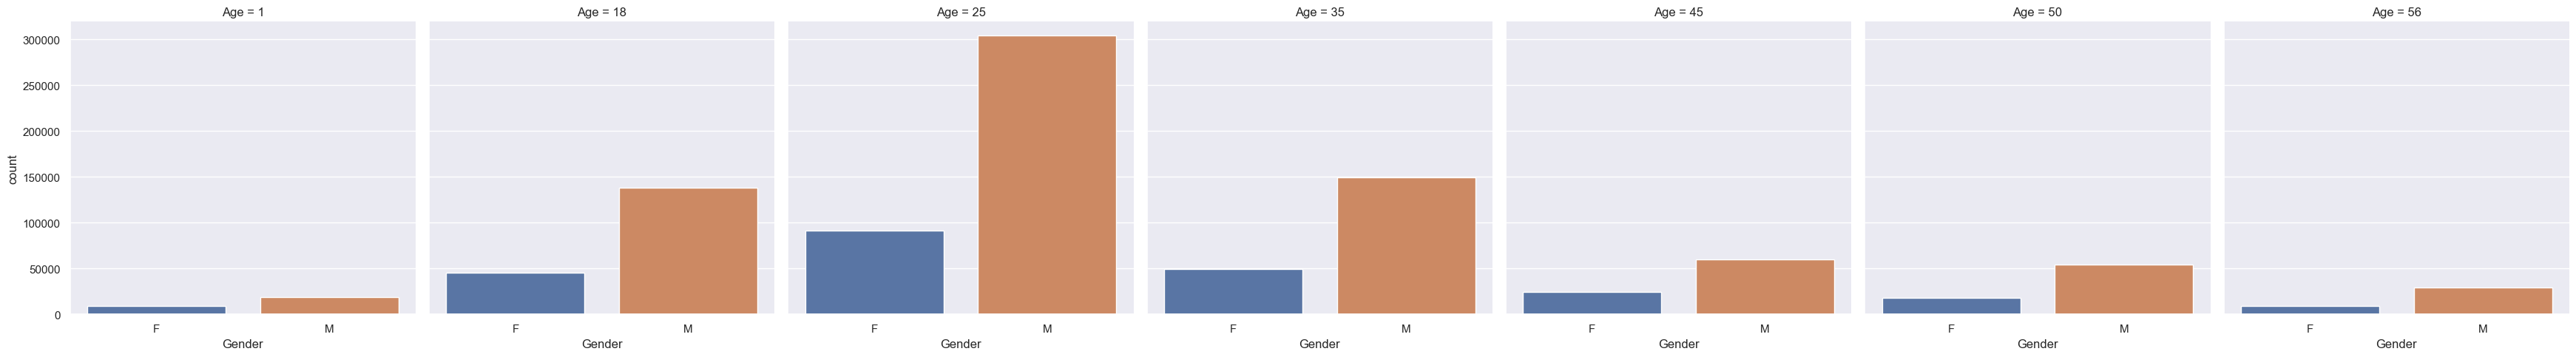

In [85]:
sns.catplot(x='Gender', col='Age', data=viewer_data, kind='count')

_Checking out for the impact of user's occupation on the Rating._

In [86]:
viewer_data['Occupation'].value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

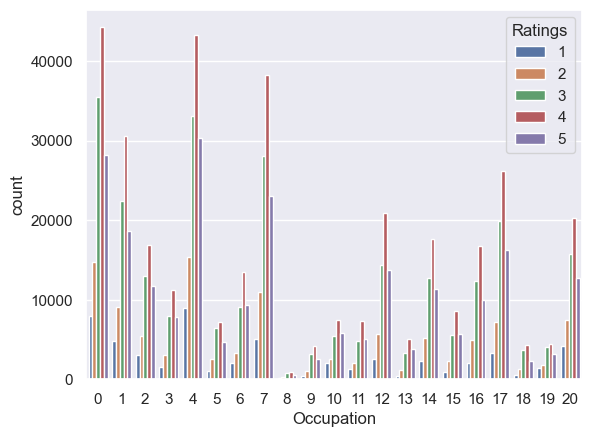

In [87]:
sns.countplot(x='Occupation', hue='Ratings', data=viewer_data)

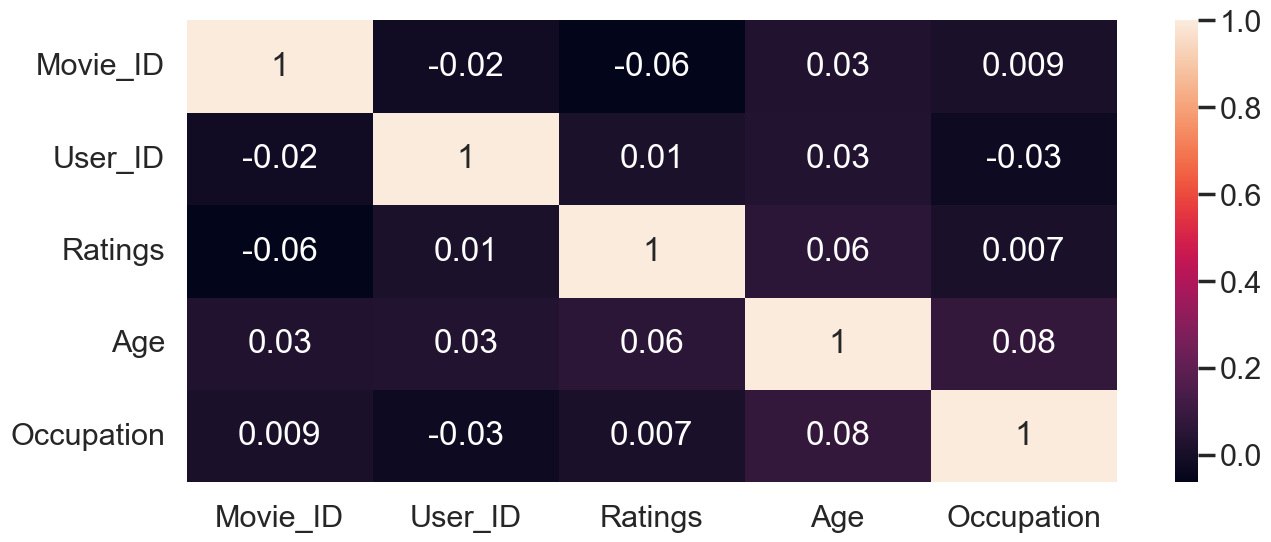

In [88]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = viewer_data.drop(['Movie_Name','Genre','Time_Stamp','Gender','Zip-code'],axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

_Correlation between potentially important feature i.e., Gender could not be determined due to their data type. We need to feature engineer or encode them first._

In [89]:
viewer_data = pd.get_dummies(viewer_data, columns=['Gender'])

In [90]:
viewer_data.shape

(1000209, 11)

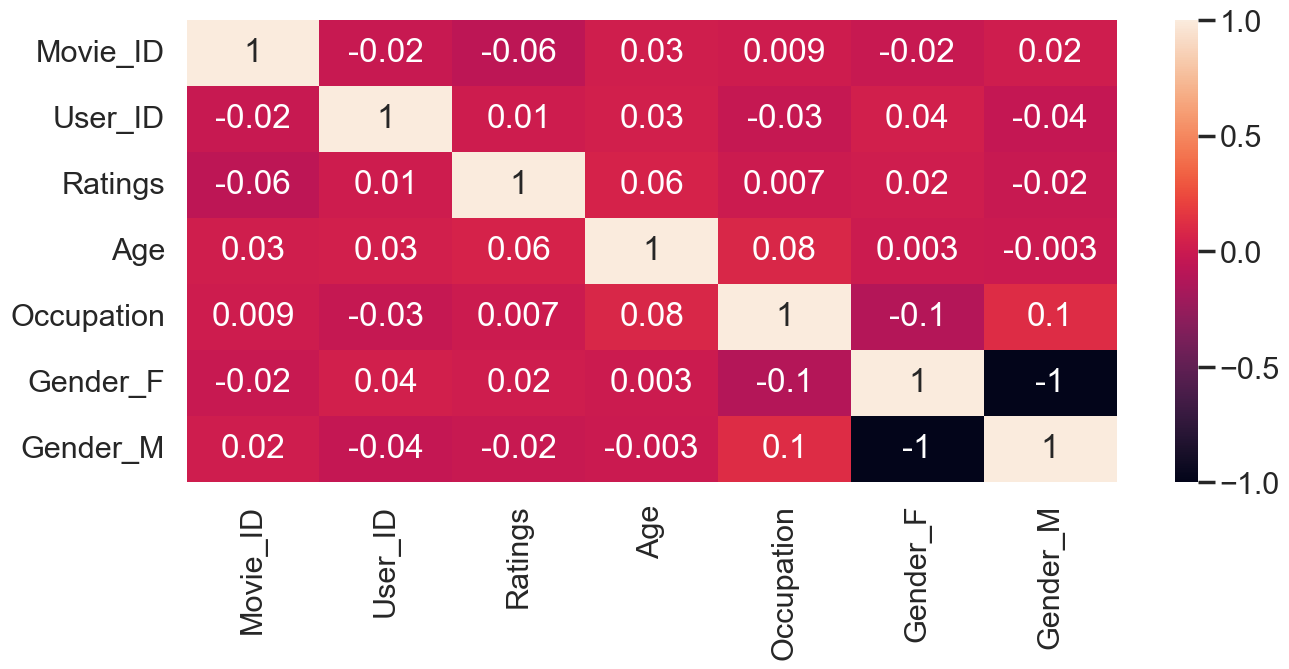

In [91]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = viewer_data.drop(['Movie_Name','Time_Stamp','Zip-code', 'Genre'],axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

### 4. Feature Engineering

_Correlation between potentially important feature i.e., Genre could not be determined due to their data type. So, we need to feature engineer this column in order to find correlation. And also for getting the predictions we have to one hot encode it so we can use this feature._

In [92]:
viewer_data.head(3)

,Movie_ID,Movie_Name,Genre,User_ID,Ratings,Time_Stamp,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,10,48067,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,10,48067,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,10,48067,1,0


### Adding and Dropping columns

In [93]:
from sklearn.preprocessing import MultiLabelBinarizer

In [94]:
#Split the Genre column into lists of genres
viewer_data['Genre'] = viewer_data['Genre'].str.split('|')

In [95]:
viewer_data.head(3)

,Movie_ID,Movie_Name,Genre,User_ID,Ratings,Time_Stamp,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,1,10,48067,1,0
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,1,10,48067,1,0
2,150,Apollo 13 (1995),[Drama],1,5,978301777,1,10,48067,1,0


#### One hot encoding 

In [96]:
# Use MultiLabelBinarizer to perform one-hot encoding on the lists of genres
Binarizer = MultiLabelBinarizer()
genre_encoded = Binarizer.fit_transform(viewer_data['Genre'])
genre_data = pd.DataFrame(genre_encoded, columns=Binarizer.classes_)

In [97]:
genre_data.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [98]:
# Merge the one-hot encoded genre dataframe with the original dataframe
encoded_viewer_data = pd.concat([viewer_data, genre_data], axis=1)
encoded_viewer_data.drop('Genre', axis=1, inplace=True)

In [99]:
# Display the head of the new dataframe with encoded genres
encoded_viewer_data.head()

,Movie_ID,Movie_Name,User_ID,Ratings,Time_Stamp,Age,Occupation,Zip-code,Gender_F,Gender_M,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,1,10,48067,1,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,5,978824351,1,10,48067,1,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,5,978301777,1,10,48067,1,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,978300760,1,10,48067,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,5,978824195,1,10,48067,1,0,...,0,0,0,0,0,0,0,0,1,0


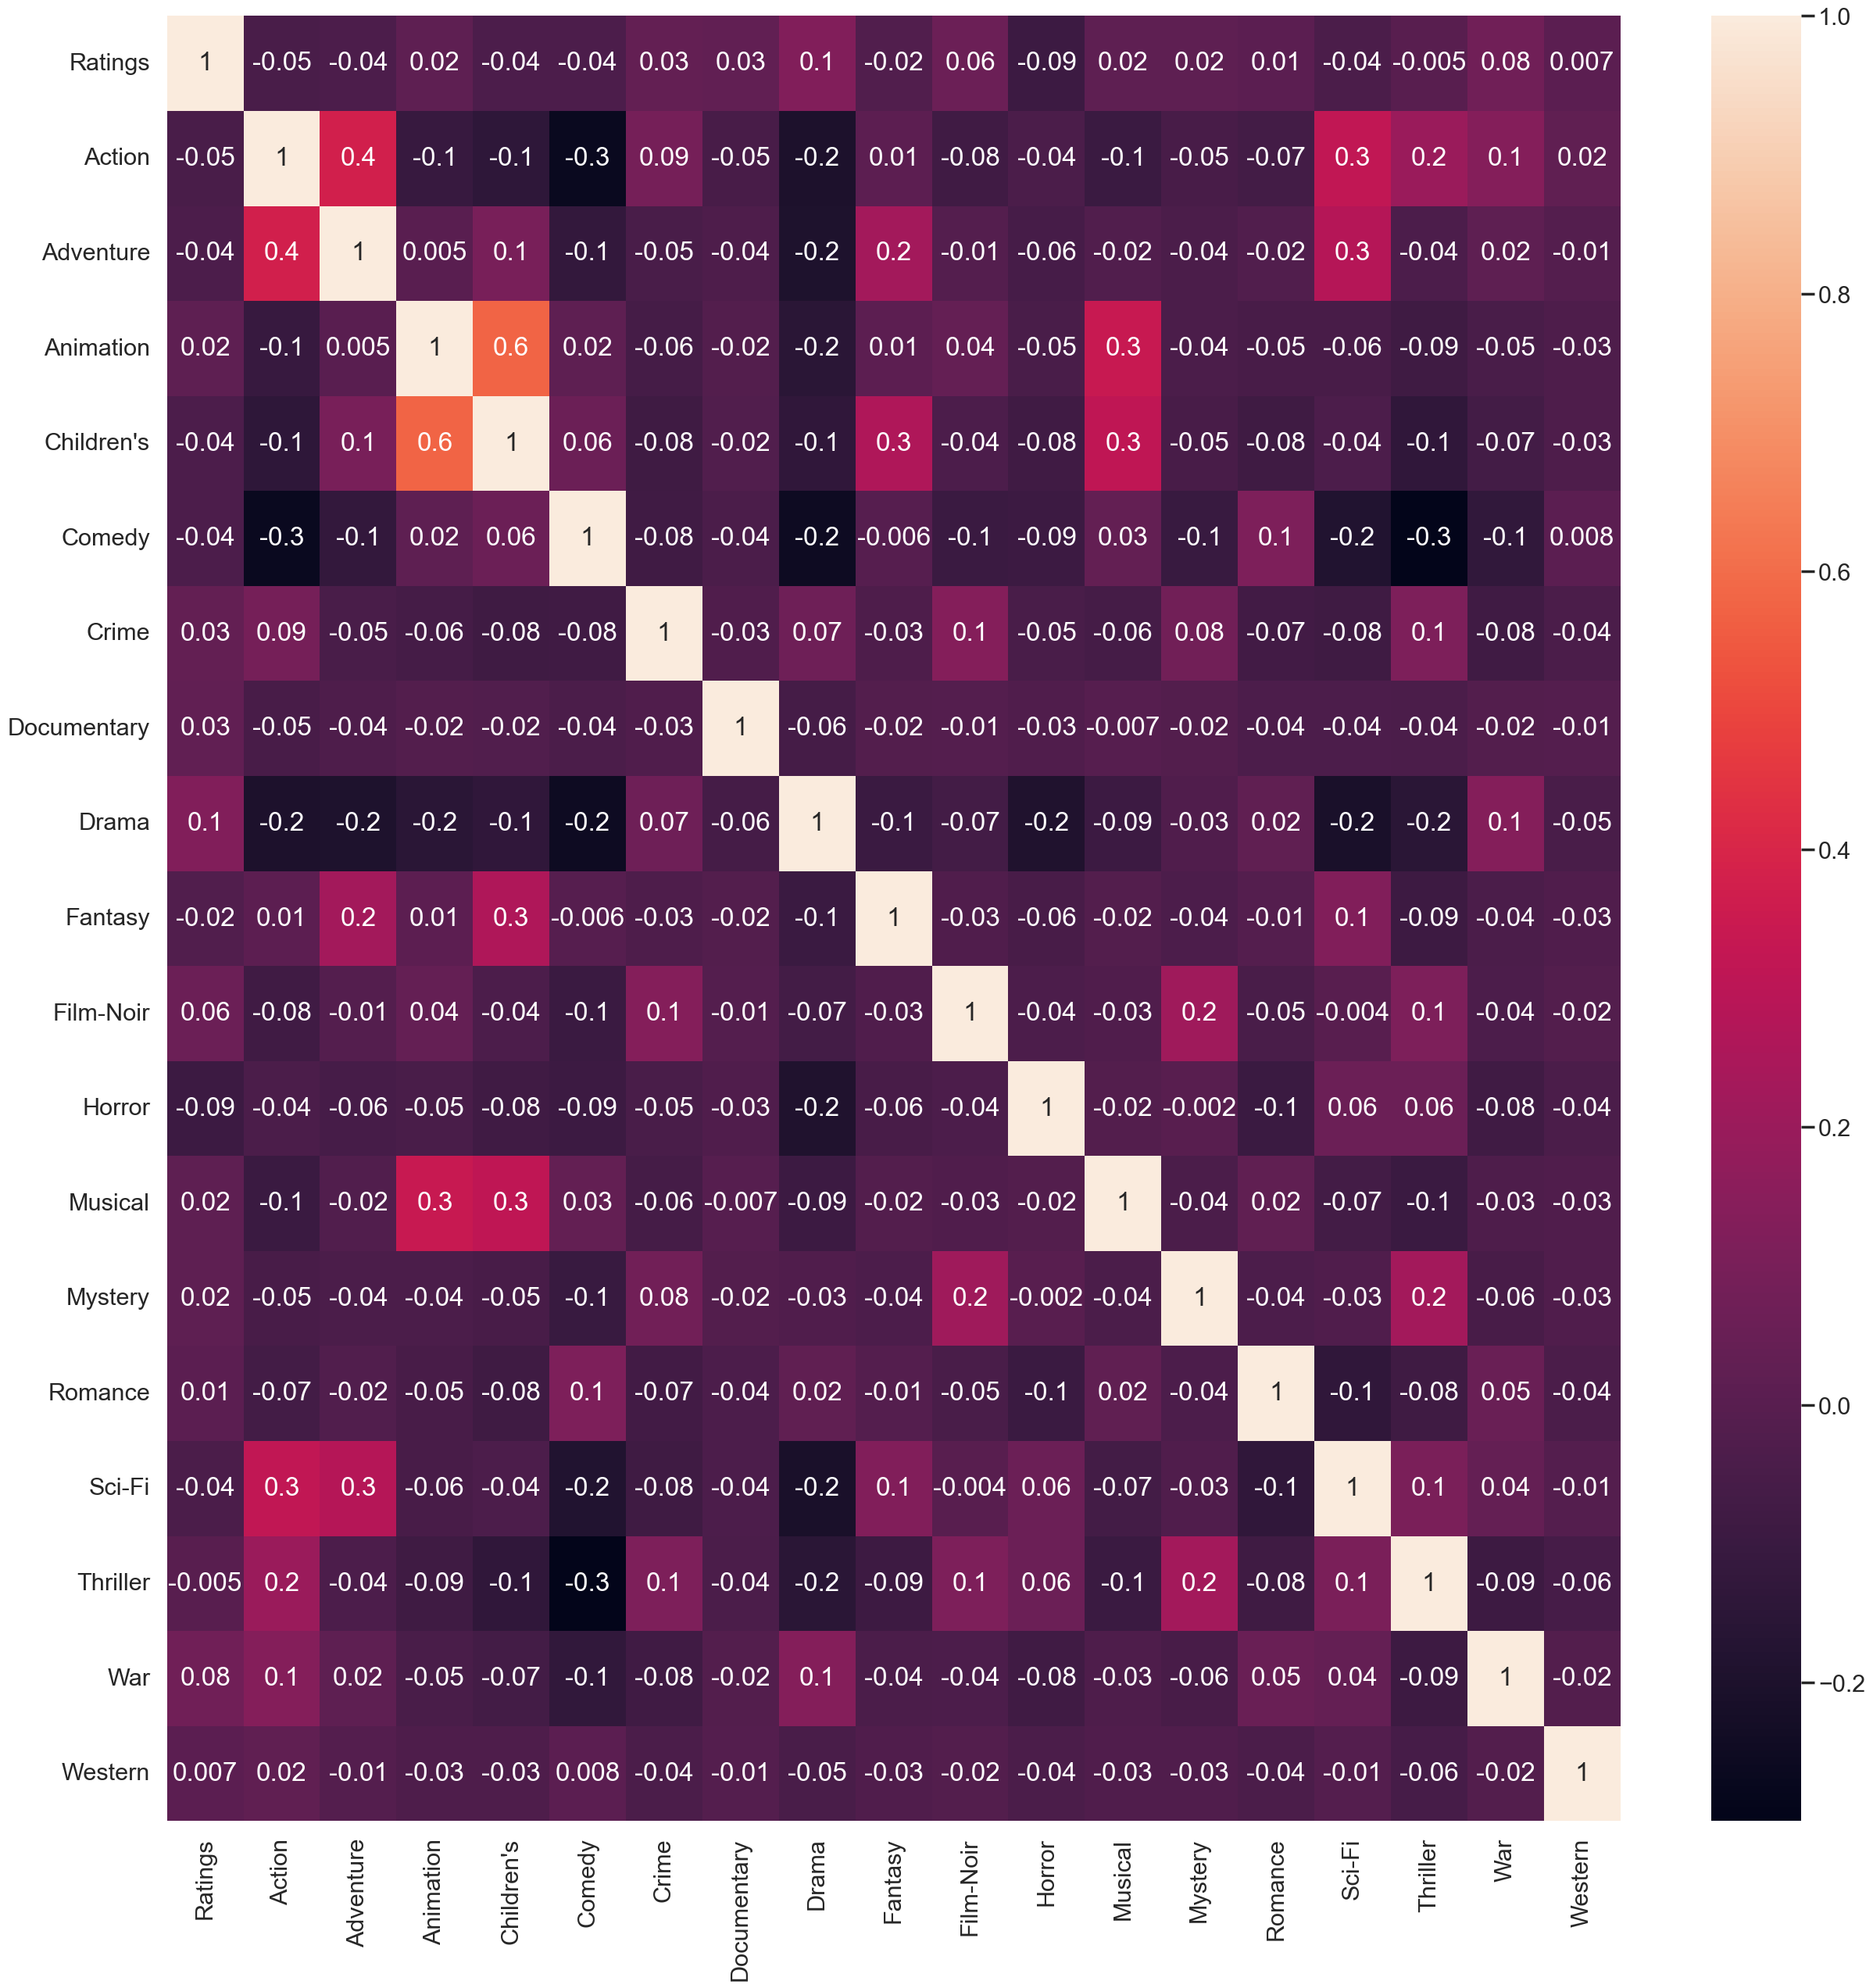

In [100]:
sns.set_context('poster')
plt.figure(figsize=(30,30))
cor = encoded_viewer_data.drop(['Movie_Name','Movie_ID','Occupation','Gender_M','Gender_F','User_ID','Age','Time_Stamp','Zip-code'],axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

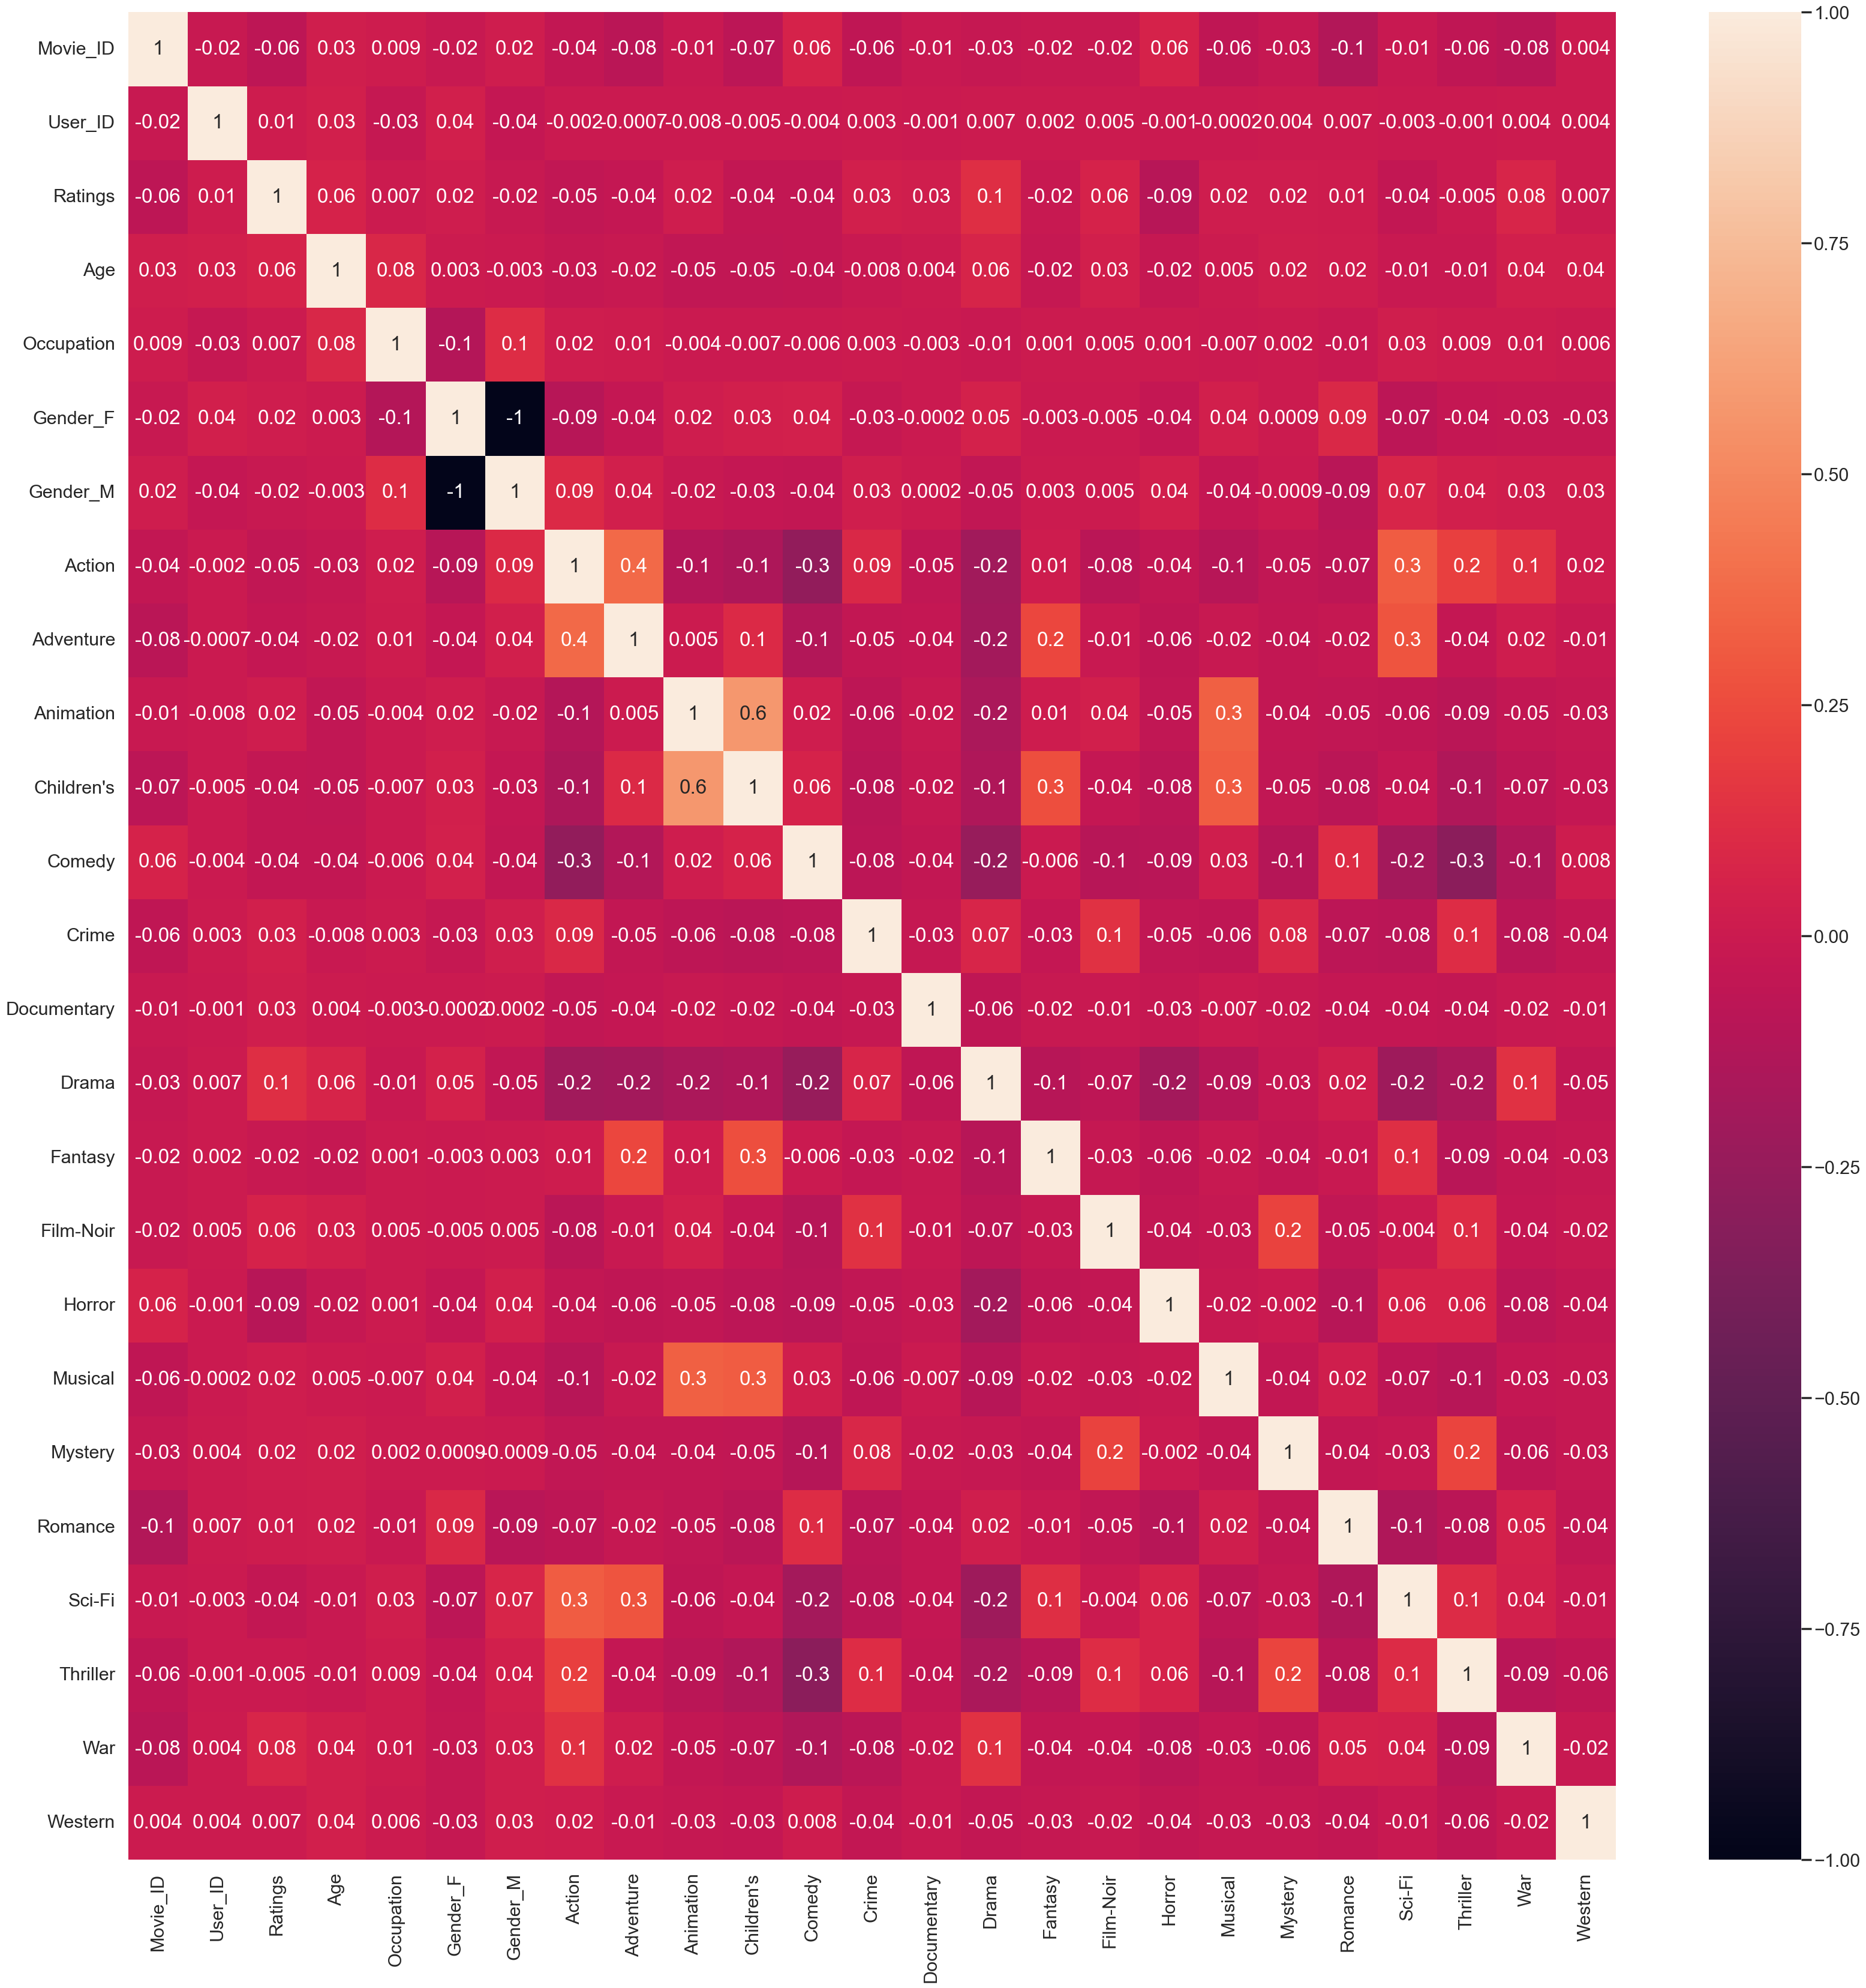

In [101]:
sns.set_context('poster')
plt.figure(figsize=(40,40))
cor = encoded_viewer_data.drop(['Movie_Name','Time_Stamp','Zip-code'],axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

In [102]:
encoded_viewer_data.to_csv('Encoded_Data.csv')

### 5. Applying machine learning models

In [103]:
movie_info=encoded_viewer_data[['Movie_ID','User_ID','Movie_Name','Time_Stamp','Zip-code']]

In [104]:
movie_info

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code
0,1,1,Toy Story (1995),978824268,48067
1,48,1,Pocahontas (1995),978824351,48067
2,150,1,Apollo 13 (1995),978301777,48067
3,260,1,Star Wars: Episode IV - A New Hope (1977),978300760,48067
4,527,1,Schindler's List (1993),978824195,48067
...,...,...,...,...,...
1000204,3513,5727,Rules of Engagement (2000),958489970,92843
1000205,3535,5727,American Psycho (2000),958489970,92843
1000206,3536,5727,Keeping the Faith (2000),958489902,92843
1000207,3555,5727,U-571 (2000),958490699,92843


#### Creating Independent and Dependent Variables

In [105]:
X =encoded_viewer_data.drop(['Ratings','Movie_ID','User_ID','Movie_Name','Time_Stamp','Zip-code'], axis=1)
Y = encoded_viewer_data[['Ratings']]

#### Normalizing Data

In [106]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
x_scaled_minmax

array([[0.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43636364, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43636364, 0.2       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.43636364, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
features =['Age','Occupation','Gender_F','Gender_M','Action','Adventure','Animation',"Children's","Comedy","Crime",'Documentary', 'Drama',
       'Fantasy', 'Film-Noir',"Horror",'Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western']

In [108]:
X = pd.DataFrame(x_scaled_minmax, columns=features)
X.head(3)

,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
print(X.shape)
print(Y.shape)

(1000209, 22)
(1000209, 1)


In [110]:
X.head(3)

,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
Y.head(3)

,Ratings
0,5
1,5
2,5


#### Train Test Splitting

In [112]:
X=pd.concat([movie_info,X],axis=1)

In [113]:
X.head(3)

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code,Age,Occupation,Gender_F,Gender_M,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,1,Toy Story (1995),978824268,48067,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48,1,Pocahontas (1995),978824351,48067,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,150,1,Apollo 13 (1995),978301777,48067,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
from sklearn.model_selection import train_test_split
xtrain,xtest, Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=5,shuffle=True)
print(xtrain.shape, Y_train.shape)
print(xtest.shape, Y_test.shape)

(700146, 27) (700146, 1)
(300063, 27) (300063, 1)


In [115]:
xtrain.head(2)

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code,Age,Occupation,Gender_F,Gender_M,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
342864,1240,3617,"Terminator, The (1984)",966599531,49034,0.618182,0.35,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
389177,2717,4007,Ghostbusters II (1989),965816704,88005,0.618182,0.60,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
xtest.head(2)

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code,Age,Occupation,Gender_F,Gender_M,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
257495,480,2748,Jurassic Park (1993),973207620,85719,0.436364,0.20,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
932343,293,3316,"Professional, The (a.k.a. Leon: The Profession...",967940700,92557,0.000000,0.95,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [117]:
X_train=xtrain.drop(['Movie_ID','User_ID','Movie_Name','Time_Stamp','Zip-code'], axis=1)
X_test=xtest.drop(['Movie_ID','User_ID','Movie_Name','Time_Stamp','Zip-code'], axis=1)

In [118]:
X_train.head(2)

,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
342864,0.618182,0.35,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
389177,0.618182,0.60,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
Y_train.head(2)

,Ratings
342864,5
389177,1


In [120]:
X_test.head(2)

,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
257495,0.436364,0.20,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
932343,0.000000,0.95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [121]:
Y_test.head(2)

,Ratings
257495,1
932343,4


### XG Boost

In [123]:
#!pip install xgboost

In [124]:
import xgboost as xgb

**Model Training**

In [125]:
Y_train -= 1
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=1, num_parallel_tree=None,
              objective='multi:softprob', ...)

**Making Predictions**

In [126]:
xgb_pred = clf_xgb.predict(X_test)
xgb_pred_prb=clf_xgb.predict_proba(X_test)[:,1]

**Accuracy**

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
xgb_accuracy= accuracy_score(Y_test, xgb_pred)
print("Accuracy: {}".format(xgb_accuracy))

Accuracy: 0.25695603923176136


**Precision**

In [129]:
from sklearn.metrics import precision_score

In [130]:
xgb_precision= precision_score(Y_test, xgb_pred, average='macro')
print("Precision: {}".format(xgb_precision))

Precision: 0.1643945455506597


D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Recall**

In [131]:
from sklearn.metrics import recall_score

In [132]:
xgb_recall= recall_score(Y_test, xgb_pred, average='macro')
print("Recall: {}".format(xgb_recall))

Recall: 0.1809317215031423


D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**F1 Score**

In [133]:
from sklearn.metrics import f1_score

In [134]:
xgb_f1_score=f1_score(Y_test, xgb_pred, average='macro')
print("F1 Score: {}".format(xgb_f1_score))

F1 Score: 0.12451347899320368


**Classification Report**

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(Y_test, xgb_pred))

D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: Und

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.01      0.02     16880
           2       0.18      0.21      0.19     32059
           3       0.26      0.77      0.39     78538
           4       0.34      0.09      0.14    104725
           5       0.00      0.00      0.00     67861

    accuracy                           0.26    300063
   macro avg       0.16      0.18      0.12    300063
weighted avg       0.22      0.26      0.17    300063



D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
model = LogisticRegression(random_state=5)

#### Model Training

In [139]:
Y_train += 1
model.fit(X_train, Y_train)

D:\Others\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Others\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

#### Making Prediction

In [140]:
pred = model.predict(X_test)

In [141]:
pred_prb = model.predict_proba(X_test)

In [142]:
pd.DataFrame(pred).head(5)

,0
0,4
1,4
2,4
3,4
4,4


In [143]:
Y_test.head()

,Ratings
257495,1
932343,4
625469,2
917851,4
166668,2


In [144]:
pd.DataFrame(pred_prb).head(5)

,0,1,2,3,4
0,0.080918,0.144834,0.290938,0.311063,0.172247
1,0.027138,0.089795,0.237559,0.377633,0.267875
2,0.071173,0.118766,0.279179,0.345135,0.185748
3,0.026612,0.086778,0.268526,0.385792,0.232292
4,0.056456,0.123864,0.264576,0.344847,0.210257


In [145]:
ratings_class=np.unique(Y_test)

In [146]:
ratings_class

array([1, 2, 3, 4, 5], dtype=int64)

In [147]:
ratings_predictions={ratings_class[i]: pred_prb[:,i] for i in range(len(ratings_class))}

In [148]:
pd.DataFrame(ratings_predictions).head(5)

,1,2,3,4,5
0,0.080918,0.144834,0.290938,0.311063,0.172247
1,0.027138,0.089795,0.237559,0.377633,0.267875
2,0.071173,0.118766,0.279179,0.345135,0.185748
3,0.026612,0.086778,0.268526,0.385792,0.232292
4,0.056456,0.123864,0.264576,0.344847,0.210257


In [149]:
Y_test.head(5)

,Ratings
257495,1
932343,4
625469,2
917851,4
166668,2


In [150]:
x = X_test.copy()
x['pred_rating'] = pred
x['actual_rating'] = Y_test

In [151]:
x.head(5)

,Age,Occupation,Gender_F,Gender_M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,pred_rating,actual_rating
257495,0.436364,0.20,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1
932343,0.000000,0.95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,4
625469,0.618182,0.85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
917851,0.618182,0.35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,4
166668,0.436364,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,2


### 7. Model Evaluation

In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
confusion_matrix(Y_test, pred)

array([[    1,     0,  1755, 14889,   235],
       [    0,     0,  2509, 28978,   572],
       [    1,     0,  4598, 71898,  2041],
       [    0,     0,  4415, 96157,  4153],
       [    0,     0,  2210, 61623,  4028]], dtype=int64)

In [154]:
rating_1_1, rating_1_2, rating_1_3, rating_1_4, rating_1_5, rating_2_1, rating_2_2, rating_2_3, rating_2_4, rating_2_5, rating_3_1, rating_3_2, rating_3_3, rating_3_4, rating_3_5, rating_4_1, rating_4_2, rating_4_3, rating_4_4, rating_4_5, rating_5_1, rating_5_2, rating_5_3, rating_5_4, rating_5_5= confusion_matrix(Y_test, pred).ravel()
conf_matrix = pd.DataFrame({"pred_1": [rating_1_1, rating_2_1, rating_3_1, rating_4_1, rating_5_1], "pred_2": [rating_1_2, rating_2_2, rating_3_2, rating_4_2, rating_5_2], "pred_3": [rating_1_3, rating_2_3, rating_3_3, rating_4_3, rating_5_3], "pred_4": [rating_1_4, rating_2_4, rating_3_4, rating_4_4, rating_5_4], "pred_5": [rating_1_5, rating_2_5, rating_3_5, rating_4_5, rating_5_5]}, index=["Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5"])

In [155]:
conf_matrix

,pred_1,pred_2,pred_3,pred_4,pred_5
Rating 1,1,0,1755,14889,235
Rating 2,0,0,2509,28978,572
Rating 3,1,0,4598,71898,2041
Rating 4,0,0,4415,96157,4153
Rating 5,0,0,2210,61623,4028


**Accuracy**

In [156]:
lr_accuracy = accuracy_score(Y_test, pred)

In [157]:
lr_accuracy

0.349206666600014

**Precision**

In [158]:
lr_precision = precision_score(Y_test, pred, average='macro')

D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
lr_precision

0.30272696499036467

**Recall**

In [160]:
lr_recall = recall_score(Y_test, pred, average='macro')

In [161]:
lr_recall

0.20722930009289448

**F1 Score**

In [162]:
lr_f1_score = f1_score(Y_test, pred, average='macro')

In [163]:
lr_f1_score

0.14168863331556114

**Classification Report**

In [164]:
print(classification_report(Y_test, pred))

D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      0.00      0.00     16880
           2       0.00      0.00      0.00     32059
           3       0.30      0.06      0.10     78538
           4       0.35      0.92      0.51    104725
           5       0.37      0.06      0.10     67861

    accuracy                           0.35    300063
   macro avg       0.30      0.21      0.14    300063
weighted avg       0.31      0.35      0.23    300063



D:\Others\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 8. Comparing the models

In [165]:
comparison_dict={"Algorithm":["XG Boost","Logistic Regression"],
                 "Accuracy":[xgb_accuracy,lr_accuracy],
                 "Precision":[xgb_precision,lr_precision],
                 "Recall":[xgb_recall,lr_recall],
                 "F1 Score":[xgb_f1_score,lr_f1_score]
                }

In [166]:
comparison = pd.DataFrame(comparison_dict)
comparison

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,XG Boost,0.256956,0.164395,0.180932,0.124513
1,Logistic Regression,0.349207,0.302727,0.207229,0.141689


**Final Data Frame**

In [167]:
#Results from XG boost Model
x1 = xtest.copy()
x1['pred'] = xgb_pred
x1['actual'] = Y_test

In [168]:
x1.head(2)

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code,Age,Occupation,Gender_F,Gender_M,Action,...,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,pred,actual
257495,480,2748,Jurassic Park (1993),973207620,85719,0.436364,0.20,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1
932343,293,3316,"Professional, The (a.k.a. Leon: The Profession...",967940700,92557,0.000000,0.95,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,4


In [169]:
#Results from Logistic Regression Model
x2 = xtest.copy()
x2['pred'] = pred
x2['actual'] = Y_test

In [170]:
x2.head(2)

,Movie_ID,User_ID,Movie_Name,Time_Stamp,Zip-code,Age,Occupation,Gender_F,Gender_M,Action,...,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,pred,actual
257495,480,2748,Jurassic Park (1993),973207620,85719,0.436364,0.20,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,1
932343,293,3316,"Professional, The (a.k.a. Leon: The Profession...",967940700,92557,0.000000,0.95,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,4
